# Spotify Popularity Prediction

O projeto de previsão de popularidade no Spotify tem como objetivo prever a popularidade de uma música em particular no Spotify com base em suas características. Para isso, serão usados dados disponíveis no Kaggle, e técnicas de análise de dados e Machine Learning serão aplicadas utilizando a linguagem Python e algumas bibliotecas, como Pandas, Matplotlib, Seaborn e Scikit-learn. 

O resultado esperado é um modelo de classificação capaz de prever com precisão a popularidade de novas músicas com base em suas características.

### Dataset

Base de dados disponível no Kaggle.

Link: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

-   **track_id**: O ID do Spotify para a faixa
-   **artists**: Os nomes dos artistas que tocaram a música. Se houver mais de um artista, eles são separados por um ;
-   **album_name**: O nome do álbum em que a faixa aparece
-   **track_name**: Nome da faixa
-   **popularity**: A popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e baseia-se principalmente no número total de reproduções que a faixa teve e na recenticidade dessas reproduções. Em geral, as músicas que estão sendo muito reproduzidas agora terão uma popularidade maior do que as músicas que foram muito reproduzidas no passado. Faixas duplicadas (por exemplo, a mesma faixa de um single e de um álbum) são avaliadas independentemente. A popularidade do artista e do álbum é derivada matematicamente da popularidade da faixa.
-   **duration_ms**: O comprimento da faixa em milissegundos
-   **explicit**: Se a faixa possui ou não letras explícitas (verdadeiro = sim, tem; falso = não tem OU desconhecido)
-   **danceability**: Danceability descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade rítmica, força do beat e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é mais dançável
-   **energy**: Energy é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Tipicamente, faixas energéticas têm uma sensação rápida, alta e barulhenta. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach tem baixa pontuação na escala
-   **key**: A tecla em que a faixa está. Inteiros mapeiam para notas usando a notação padrão da classe de pitch. Exemplo: 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1
-   **loudness**: O volume geral de uma faixa em decibéis (dB)
-   **mode**: Mode indica a modalidade (maior ou menor) de uma faixa, o tipo de escala a partir da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0
-   **speechiness**: Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente parecida com fala a gravação (por exemplo, talk show, livro em áudio, poesia), mais próximo de 1,0 o valor atribuído ao atributo. Valores acima de 0,66 descrevem faixas que provavelmente são compostas inteiramente por palavras faladas. Os valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou camadas, incluindo casos como a música rap. Valores abaixo de 0,33 provavelmente representam músicas e outras faixas não semelhantes à fala
-   **acousticness**: Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica
-   **instrumentalness**: Prevê se uma faixa não contém vocais. Sons "Ooh" e "aah" são tratados como instrumentais nesse contexto. Faixas de rap ou spoken word são claramente "vocais". Quanto mais próximo o valor de instrumentalidade é de 1,0, maior a probabilidade da faixa não conter conteúdo vocal
-   **liveness**: Detecta a presença de uma plateia na gravação. Valores de liveness mais altos representam uma probabilidade aumentada de que a faixa foi tocada ao vivo. Um valor acima de 0,8 fornece forte probabilidade de que a faixa seja ao vivo
-   **valence**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida

-   **tempo**: O tempo geral estimado de uma faixa em batidas por minuto (BPM). Em terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média das batidas.
-   **time_signature**: Uma assinatura de tempo estimada. A assinatura de tempo (ou compasso) é uma convenção notacional que especifica quantas batidas há em cada compasso (ou medida). A assinatura de tempo varia de 3 a 7 indicando assinaturas de tempo de 3/4 a 7/4.
-   **track_genre**: O gênero ao qual a faixa pertence.

### Library

In [6]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Aprimorando visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)
pd.set_option('display.max_columns', None)

# EDA

In [7]:
# Carregando arquivo CSV do repo
url = 'https://raw.githubusercontent.com/domafras/spotify-popularity-prediction/master/data/dataset.csv'
df = pd.read_csv(url, index_col=0)

Observação: o parâmetro 'index_col=0' serve para evitar a coluna 'Unnamed: 0' ao ler CSV com Pandas.

In [8]:
# Outra abordagem seria remover a coluna
#df = df.drop(columns = ['Unnamed: 0'])

In [9]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
# Número de linhas, colunas e tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [11]:
# Dimensionalidade do DataFrame
df.shape

(114000, 20)

In [12]:
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')

Número de linhas duplicadas: 450


Podemos observar que existem 450 linhas duplicadas. Ou seja,  o dataset possui 113.550 (114.000 - 450) entradas válidas.

In [13]:
print(f'Número de valores nulos:\n{df.isna().sum()}')

Número de valores nulos:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Podemos observar que 'artists', 'album_name' e 'track_name' possuem 1 dado nulo cada.

In [14]:
# Ordenando variáveis de forma descendente em relação aos valores faltantes
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

album_name          0.000009
track_name          0.000009
artists             0.000009
track_id            0.000000
speechiness         0.000000
time_signature      0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
instrumentalness    0.000000
acousticness        0.000000
loudness            0.000000
mode                0.000000
key                 0.000000
energy              0.000000
danceability        0.000000
explicit            0.000000
duration_ms         0.000000
popularity          0.000000
track_genre         0.000000
dtype: float64

Esses dados faltantes ou duplicados não são tão impactantes e podem ser removidos.

In [15]:
# Removendo valores nulos
df = df.dropna()

# Removendo duplicados
df = df.drop_duplicates()

Convertendo a duração das músicas de 'ms' para 'minutos':

In [16]:
# Ms para Min
df['duration_min'] = df['duration_ms'] / 1000 / 60

print(df[['track_name', 'duration_min']])

                        track_name  duration_min
0                           Comedy      3.844433
1                 Ghost - Acoustic      2.493500
2                   To Begin Again      3.513767
3       Can't Help Falling In Love      3.365550
4                          Hold On      3.314217
...                            ...           ...
113995         Sleep My Little Boy      6.416650
113996            Water Into Light      6.416667
113997              Miss Perfumado      4.524433
113998                     Friends      4.731550
113999                   Barbincor      4.030433

[113549 rows x 2 columns]


In [17]:
# Estatísticas descritivas do DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,113549.0,33.324433,22.283855,0.0000,17.000000,35.000000,50.0000,1.000000e+02
duration_ms,113549.0,228081.370844,106413.098525,8586.0000,174184.000000,213000.000000,261588.0000,5.237295e+06
danceability,113549.0,0.567031,0.173409,0.0000,0.456000,0.580000,0.6950,9.850000e-01
energy,113549.0,0.642091,0.251053,0.0000,0.473000,0.685000,0.8540,1.000000e+00
key,113549.0,5.309452,3.560147,0.0000,2.000000,5.000000,8.0000,1.100000e+01
loudness,113549.0,-8.243408,5.011422,-49.5310,-9.998000,-6.997000,-5.0010,4.532000e+00
mode,113549.0,0.637866,0.480620,0.0000,0.000000,1.000000,1.0000,1.000000e+00
speechiness,113549.0,0.084674,0.105762,0.0000,0.035900,0.048900,0.0845,9.650000e-01
acousticness,113549.0,0.314064,0.331906,0.0000,0.016800,0.168000,0.5960,9.960000e-01
instrumentalness,113549.0,0.155703,0.309217,0.0000,0.000000,0.000041,0.0487,1.000000e+00


Observar as estatísticas descritivas é um importante passo para ter noção da distribuição dos dados:

1. Considerando popularidade (0-100), média é 33. 
    - Portanto, a maioria das músicas nesse conjunto de dados não é popular. 
    - Apenas os 25% mais populares (percentil 75%) tem popularidade > 50.
2. A duração média das música é na casa dos 3 minutos, e as músicas mais longas entre os 4 minutos.
    - Contém outlier com 87 minutos.
3. "Valence" tem média abaixo de 0.5, indicando que as músicas tendem a ser mais tristes. A arte é melancólica?

In [18]:
# Estatisticas descritivas das variáveis do tipo object
df.describe(include='object').T

,count,unique,top,freq
track_id,113549,89740,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113549,31437,The Beatles,279
album_name,113549,46589,Alternative Christmas 2022,195
track_name,113549,73608,Run Rudolph Run,151
track_genre,113549,114,acoustic,1000


Observações dos dados do tipo object (string):

1. Artista "The Beatles" é muito frequente nesse conjunto de dados (279 aparições)
2. Curiosamente, 'album_name' e 'track_name' dizem respeito à obras natalinas. (Run Rudolph Run" é uma música de Natal regravada por vários artistas)
3. Gênero acústico é o mais frequente (1000 aparições)

### Data distribution

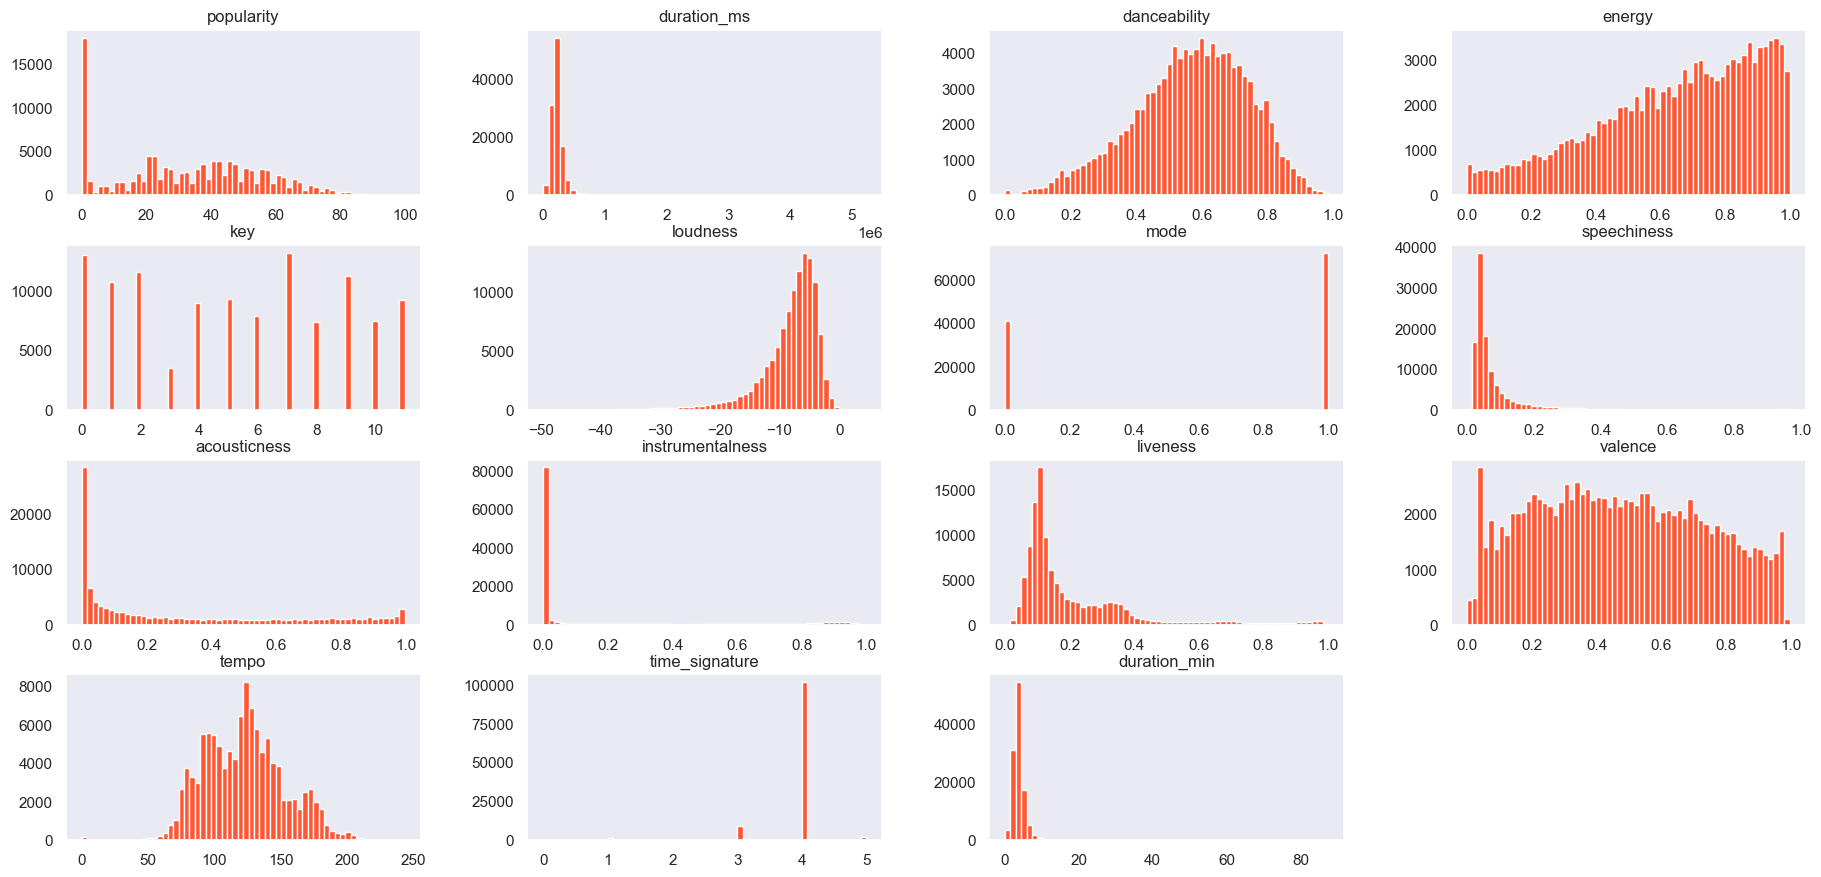

In [19]:
# Histograma
df.hist(bins=60, grid=False, figsize=(20,10), color= '#FF5733')
plt.show()

Observa-se:

- popularity: parece que há grande distribuição próxima à 0 de popularidade
- duration_min: parece ter distribuição fortemente assimétrica, mostrando a presença de valores discrepantes
- danceability: parece seguir distribuição normal
- energy: parece ser assimétrico à esquerda
- loudness: parece ser assimétrico à esquerda
- speechiness: são assimétrico à direita
- liveness: parece ser assimétrico à direita
- valence: parece seguir uma distribuição uniforme
- tempo: parece seguir distribuição normal

Resumindo

- popularity: amostra possui valores de popularidade bem baixo, sugerindo que as músicas no conjunto de dados podem não ser amplamente populares
- danceability, tempo: distribuídos uniformemente, sugerindo que as músicas no conjunto de dados têm características de danceability e tempo similares
- liveness, speechiness, loudness e energy: a assimetria das distribuições desses atributos sugere que as músicas no conjunto de dados tendem a ter valores mais baixos de liveness e speechiness, e valores mais altos de loudness e energy em média
- valence: distribuição uniforme indica que as músicas na amostra têm equilíbrio de emoções.

### Outliers

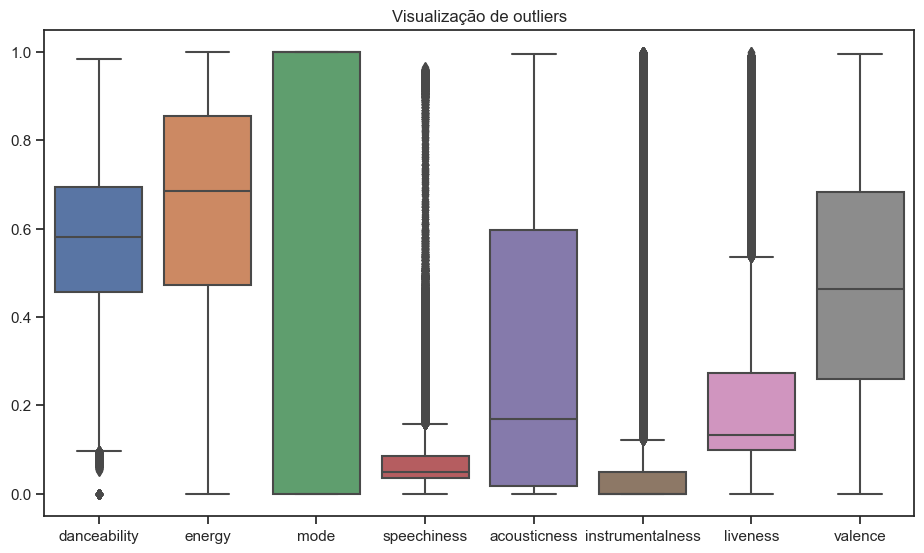

In [20]:
# Selecionando as colunas para plotar
cols = ['danceability', 'energy', 'mode', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence']

# criar boxplot com Seaborn
sns.set(style="ticks")
plt.figure(figsize=(10,6))
sns.boxplot(data=df[cols])
plt.title("Visualização de outliers")
plt.show()

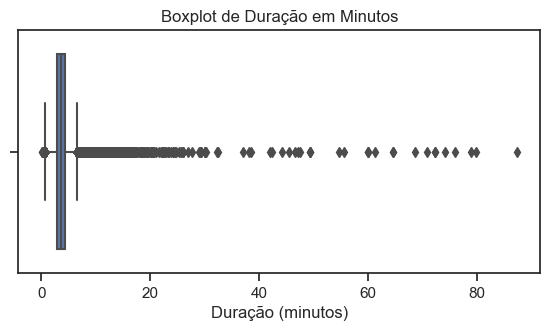

In [21]:
# criação do boxplot
plt.figure(figsize=(6, 3))
ax = sns.boxplot(x=df['duration_min'])
ax.set_title('Boxplot de Duração em Minutos')
ax.set_xlabel('Duração (minutos)')

# exibição do gráfico
plt.show()

Com essa visualização, fica perceptível que existem músicas mais longas que o normal, passando até mesmo de 1 hora.

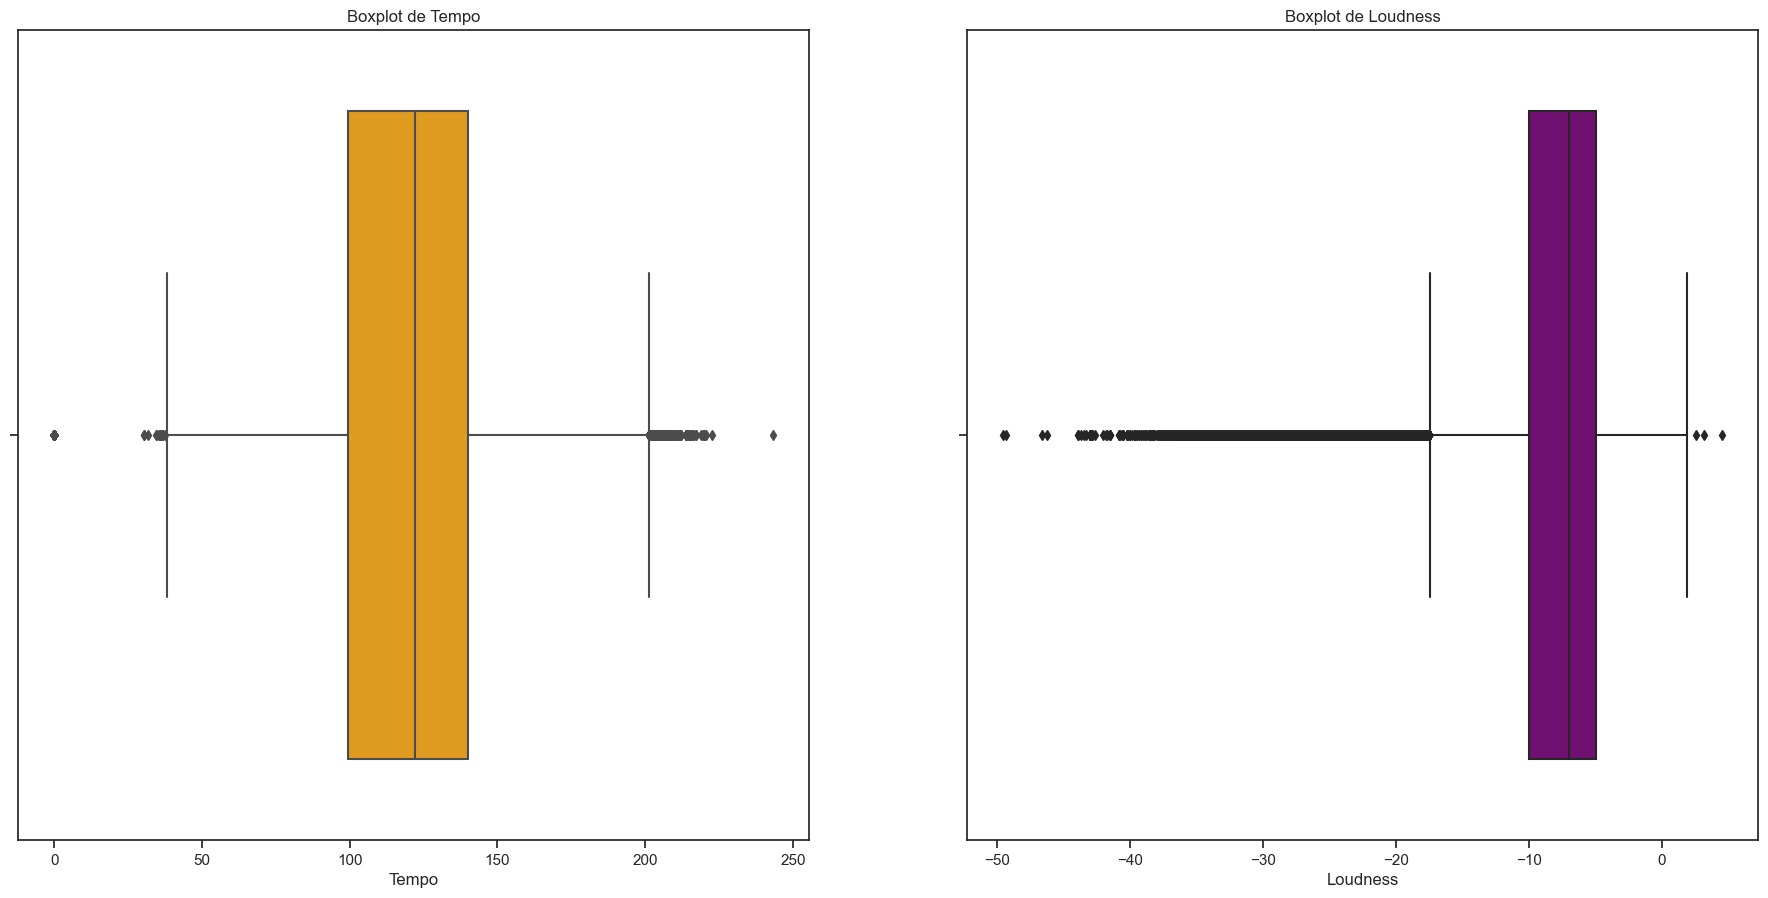

In [22]:
# Criando uma figura com dois graficos lado a lado
fig, axes = plt.subplots(ncols=2, figsize=(20,10))

# Desenhando o primeiro boxplot para tempo na primeira subtrama
sns.boxplot(x=df['tempo'], color='orange', ax=axes[0])
axes[0].set_title('Boxplot de Tempo')
axes[0].set_xlabel('Tempo')

# Desenhando o segundo boxplot para loudness na segunda subtrama
sns.boxplot(x=df['loudness'], color='purple', ax=axes[1])
axes[1].set_title('Boxplot de Loudness')
axes[1].set_xlabel('Loudness')

# Exibindo o gráfico final
plt.show()

### Q&A

#### Quantidade de artista únicos

In [23]:
print(df['artists'].unique().shape)

(31437,)


#### Contagem de músicas por artista

In [24]:
print(df['artists'].value_counts())

The Beatles                      279
George Jones                     260
Stevie Wonder                    235
Linkin Park                      224
Ella Fitzgerald                  221
                                ... 
Mr. Probz;Robin Schulz             1
Keanu Silva;Jhn McFly;Marissa      1
Alan Walker;Hans Zimmer            1
Triplo Max                         1
Jesus Culture                      1
Name: artists, Length: 31437, dtype: int64


####  10 músicas mais populares no Spotify

In [25]:
df_popularity = df.sort_values('popularity', ascending=False)
df_popularity = df_popularity.loc[:,['track_id','track_name', 'artists', 'popularity']]
df_popularity.head(10)

,track_id,track_name,artists,popularity
81051,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
20001,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
68303,5ww2BF9slyYgNOk37BlC4u,La Bachata,Manuel Turizo,98
81210,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta;Bebe Rexha,98
67356,5ww2BF9slyYgNOk37BlC4u,La Bachata,Manuel Turizo,98
88410,5ww2BF9slyYgNOk37BlC4u,La Bachata,Manuel Turizo,98
30003,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta;Bebe Rexha,98
89411,5ww2BF9slyYgNOk37BlC4u,La Bachata,Manuel Turizo,98
20008,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta;Bebe Rexha,98


Mesmo removendo duplicados anteriormente, aparentemente alguns permaneceram no conjunto de dados, à exemplo da música "Unholy".
Para de fato limpar esses dados, remover duplicados identificando o 'track_id'.

In [26]:
def get_most_popular_songs(df):
    # remover duplicatas com base no 'track_id'
    df = df.drop_duplicates(subset='track_id', keep='first')
    
    # ordenar dataframe pela popularidade
    df_popularity = df.sort_values('popularity', ascending=False)
    
    # selecionar colunas específicas
    df_popularity = df_popularity.loc[:,['track_id','track_name', 'artists', 'popularity']]
    
    # retornar as 10 primeiras linhas
    return df_popularity.head(10)

In [27]:
most_popular_songs = get_most_popular_songs(df)
most_popular_songs

,track_id,track_name,artists,popularity
20001,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
20008,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta;Bebe Rexha,98
67356,5ww2BF9slyYgNOk37BlC4u,La Bachata,Manuel Turizo,98
67358,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny;Chencho Corleone,97
67359,1IHWl5LamUGEuP4ozKQSXZ,Tití Me Preguntó,Bad Bunny,97
67559,5Eax0qFko2dh7Rl2lYs3bx,Efecto,Bad Bunny,96
20000,5IgjP7X4th6nMNDh4akUHb,Under The Influence,Chris Brown,96
79000,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,OneRepublic,96
81052,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,95


#### Artistas mais populares no Spotify

Abordagem 1: considerar quantidade de músicas populares (popularity > 70) por artista

In [28]:
# Considerando quantidade de música acima de 70, como uma obra popular do artista
popular_artists = df[df['popularity'] > 70]['artists'].value_counts()
popular_artists = popular_artists.sort_values(ascending=False)
popular_artists.head(10)

BTS                      50
Bad Bunny                48
Red Hot Chili Peppers    43
The Neighbourhood        37
Arctic Monkeys           36
Adele                    31
Nirvana                  30
Linkin Park              30
Halsey                   30
OneRepublic              28
Name: artists, dtype: int64

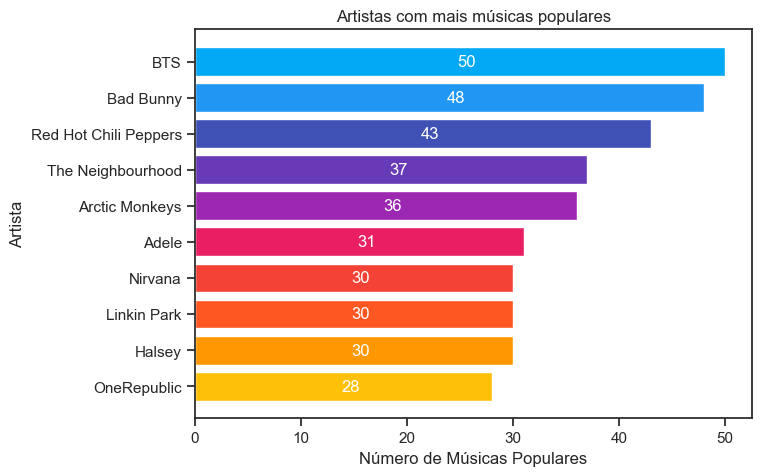

In [29]:
# Seleciona os 10 artistas mais populares e ordena do mais popular para o menos popular
popular_artists = df[df['popularity'] > 70]['artists'].value_counts().sort_values(ascending=False).head(10)

# Inverte a ordem dos dados para plotar a maior barra em cima
popular_artists = popular_artists.iloc[::-1]

# Gera o gráfico de barras horizontais com cores personalizadas
fig, ax = plt.subplots()
bars = ax.barh(popular_artists.index, popular_artists.values, color=['#FFC107','#FF9800','#FF5722','#F44336','#E91E63','#9C27B0','#673AB7','#3F51B5','#2196F3','#03A9F4'])

# Adiciona os rótulos nas barras
for i, bar in enumerate(bars):
    ax.annotate(str(popular_artists.values[i]), xy=(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2), xytext=(5, 0),
                textcoords='offset points', ha='center', va='center', color='white')

# Configura o título e os rótulos dos eixos
ax.set_title('Artistas com mais músicas populares')
ax.set_xlabel('Número de Músicas Populares')
ax.set_ylabel('Artista')

# Exibe o gráfico
plt.show()

Abordagem 2: considerar média de popularidade de cada artista

In [30]:
# Agrupando os artistas, calculando a média de popularidade para cada um e ordenando os resultados pela popularidade média em ordem decrescente
artists_popularity = df[['artists', 'popularity']]

# agrupa os dados pelo nome do artista e calcula a média de popularidade para cada grupo
artists_grouped = artists_popularity.groupby("artists").mean().reset_index()

# ordena o DataFrame em ordem decrescente pela coluna "popularity"
top10_artist_popularity = artists_grouped.sort_values(by="popularity", ascending=False)
top10_artist_popularity.head(10)

,artists,popularity
24119,Sam Smith;Kim Petras,100.0
3629,Bizarrap;Quevedo,99.0
17442,Manuel Turizo,98.0
2857,Bad Bunny;Chencho Corleone,97.0
2855,Bad Bunny;Bomba Estéreo,94.5
13565,Joji,94.0
3443,Beyoncé,93.0
11491,Harry Styles,92.0
22845,Rema;Selena Gomez,92.0
7938,Drake;21 Savage,91.0


#### Dentre os gêneros musicais, quais são mais populares entre usuários do Spotify?

Abordagem 1: média de popularidade por genero

In [31]:
popular_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
popular_genre.head(10)

track_genre
pop-film     59.280280
k-pop        56.963928
chill        53.704705
sad          52.379000
grunge       49.582583
indian       49.528529
anime        48.766767
emo          48.128000
pop          47.903323
sertanejo    47.866000
Name: popularity, dtype: float64

Abordagem 2: gênero das músicas mais populares

In [32]:
popular_genre_track = df.loc[:, ["track_genre", "popularity", "track_name"]].sort_values(by="popularity", ascending=False)[:10]
popular_genre_track

,track_genre,popularity,track_name
81051,pop,100,Unholy (feat. Kim Petras)
20001,dance,100,Unholy (feat. Kim Petras)
51664,hip-hop,99,"Quevedo: Bzrp Music Sessions, Vol. 52"
68303,latino,98,La Bachata
81210,pop,98,I'm Good (Blue)
67356,latin,98,La Bachata
88410,reggae,98,La Bachata
30003,edm,98,I'm Good (Blue)
89411,reggaeton,98,La Bachata
20008,dance,98,I'm Good (Blue)


#### Quais são as músicas mais dançáveis (danceable)?

In [33]:
danceable = df.loc[:, ["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


#### Quais são as músicas mais longas?

In [34]:
# Selecionando 'artists' e 'popularity' com loc e ordenando pela duração
long_tracks = df.loc[:, ['track_name', 'duration_min']].sort_values('duration_min', ascending=False)[:5]
long_tracks

,track_name,duration_min
73617,Unity (Voyage Mix) Pt. 1,87.288250
10935,Crossing Wires 002 - Continuous DJ Mix,79.817100
24348,The Lab 03 - Continuous DJ Mix Part 1,78.838367
73840,Amnesia Ibiza Underground 10 DJ Mix,76.064950
13344,House of Om - Mark Farina - Continuous Mix,74.125333


### Correlação entre variáveis

Verificar a correlação de dados na análise exploratória é importante porque ajuda a entender a relação entre as variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

**Correlação de Pearson** mede a dependência linear entre duas variáveis X e Y. O coeficiente resultante é um valor entre -1 e 1, onde:

- +1: Correlação linear positiva (valores das variáveis tendem a aumentar juntos)
- 0: Sem correlação linear, provavelmente as variáveis não afetam uma à outra.
- -1: Correlação linear negativa (se uma aumenta, a outra diminui)

Além disso, a correlação também ajuda a identificar possíveis problemas com o conjunto de dados, como a presença de outliers ou variáveis altamente correlacionadas, o que pode afetar a precisão dos modelos de análise de dados.

In [35]:
df_corr = df.corr('pearson')
df_corr

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
popularity,1.000000,-0.007928,0.043938,0.034407,-0.002447,-0.004167,0.047368,-0.015009,-0.045463,-0.022356,-0.094718,-0.005668,-0.041097,0.012187,0.030567,-0.007928
duration_ms,-0.007928,1.000000,-0.066005,-0.074117,0.058160,0.008519,-0.004233,-0.035961,-0.063194,-0.103676,0.125301,0.010199,-0.154795,0.024312,0.018351,1.000000
explicit,0.043938,-0.066005,1.000000,0.122179,0.096256,0.004843,0.107988,-0.037387,0.307455,-0.093748,-0.103169,0.032367,-0.003779,-0.003097,0.038234,-0.066005
danceability,0.034407,-0.074117,0.122179,1.000000,0.131694,0.036546,0.256559,-0.069783,0.108236,-0.169181,-0.183974,-0.131651,0.476755,-0.051517,0.207370,-0.074117
energy,-0.002447,0.058160,0.096256,0.131694,1.000000,0.048047,0.760624,-0.079331,0.141976,-0.732747,-0.179967,0.184810,0.258451,0.247361,0.186671,0.058160
key,-0.004167,0.008519,0.004843,0.036546,0.048047,1.000000,0.038359,-0.135871,0.020820,-0.041124,-0.006819,-0.001518,0.034233,0.010903,0.015122,0.008519
loudness,0.047368,-0.004233,0.107988,0.256559,0.760624,0.038359,1.000000,-0.042074,0.060088,-0.588111,-0.432109,0.076792,0.279428,0.212181,0.191648,-0.004233
mode,-0.015009,-0.035961,-0.037387,-0.069783,-0.079331,-0.135871,-0.042074,1.000000,-0.046773,0.096548,-0.050787,0.013900,0.021411,0.000371,-0.024365,-0.035961
speechiness,-0.045463,-0.063194,0.307455,0.108236,0.141976,0.020820,0.060088,-0.046773,1.000000,-0.001378,-0.089214,0.205092,0.036393,0.017167,-0.000397,-0.063194
acousticness,-0.022356,-0.103676,-0.093748,-0.169181,-0.732747,-0.041124,-0.588111,0.096548,-0.001378,1.000000,0.102134,-0.020313,-0.106240,-0.207620,-0.175621,-0.103676


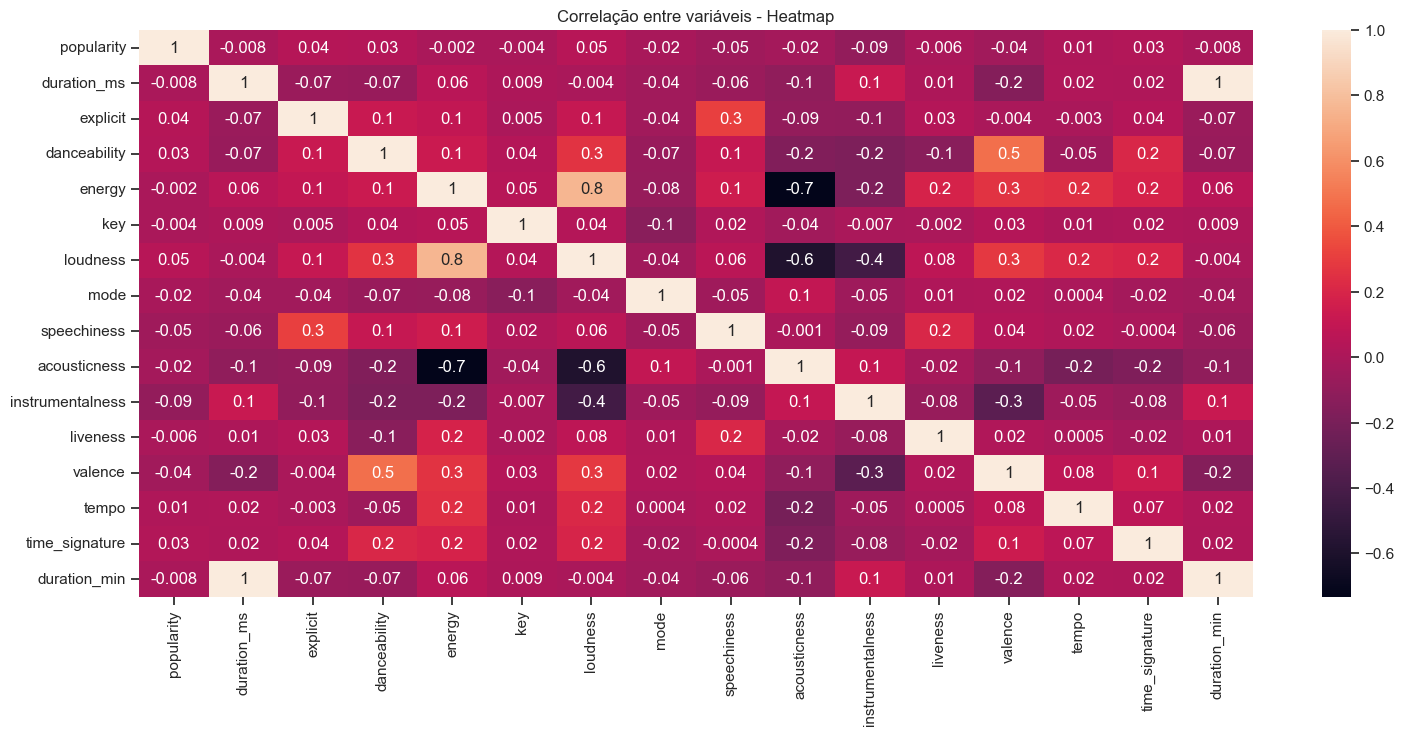

In [36]:
# Mapa de calor com Seaborn indicando correlações.
plt.figure(figsize=(16,7))
sns.heatmap(df_corr, annot=True, fmt=".1g")
plt.title("Correlação entre variáveis - Heatmap")
plt.show()

- Podemos ver que a feature 'loudness' e 'energy' possuem uma alta correlação. Ou seja, quando uma aumenta, a outra também aumenta.
- Existe correlação negativa entre 'acousticness' e 'energy', portanto musicas mais acusticas tem menos energia. Na intuição essa perpepção também ocorre, por músicas acusticas geralmente serem mais tranquilas e relaxantes.
- 'Valence' e 'danceability' tem correlação (0,5), indicando que musicas mais positivas (felizes) são mais dançáveis.
- 'Popularity' não tem correlação significativa com nenhuma outra característica presente em uma música.

In [37]:
# Salvando dataset
df = df.reset_index(drop=True)
df.to_csv('dataset_EDA.csv', index=False)